# Data Visualization

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import warnings
import plotly.express as px
px_template = "simple_white"


%matplotlib inline

D

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv', sep = "," , encoding = 'utf-8')
data.shape


(70692, 22)

In [ ]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')


The dataset has 70692 rows and 22 columns.


In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


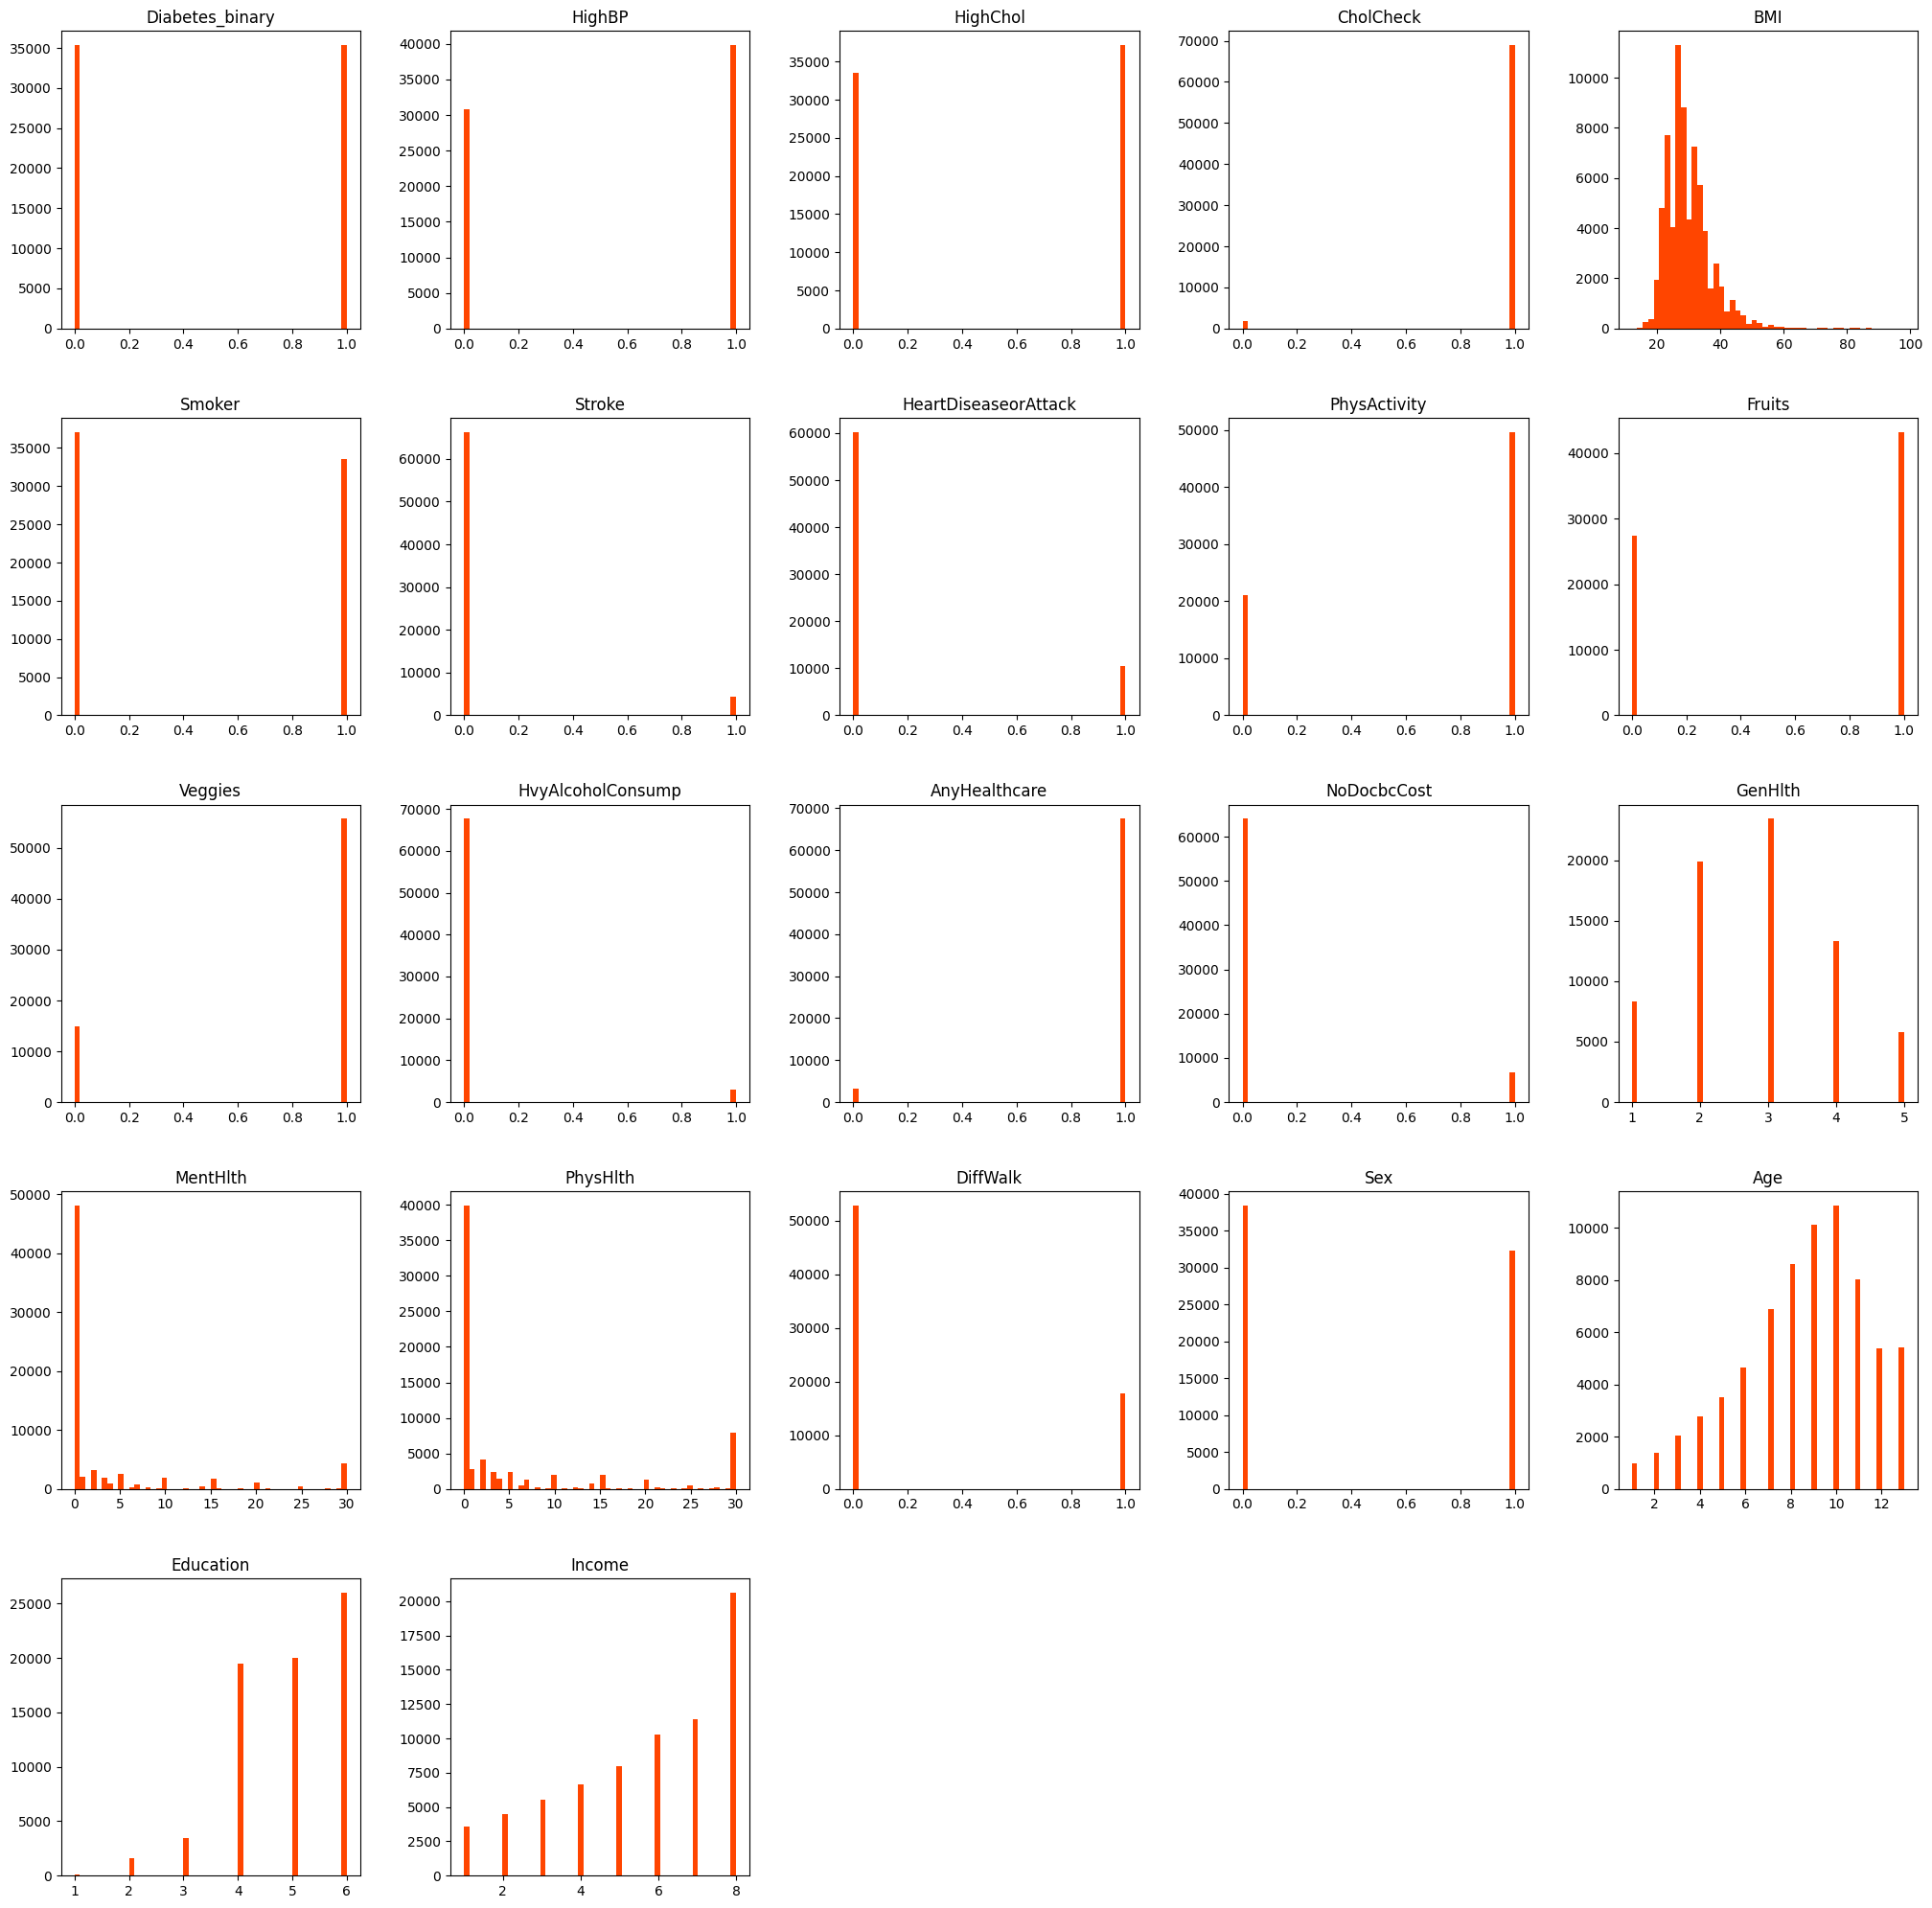

In [ ]:
ax = data.hist(bins=50, grid=False, figsize=(25,25), color='#FF4500')

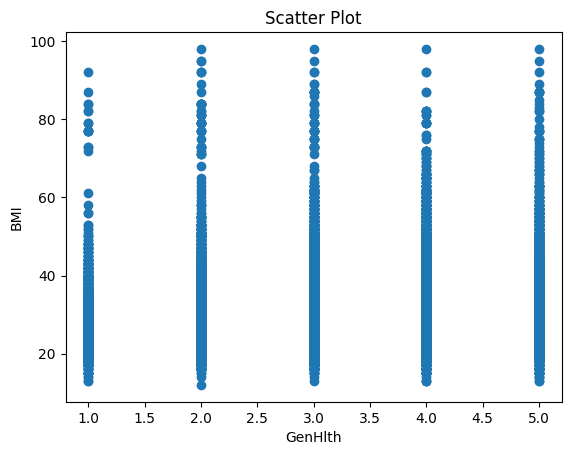

In [ ]:
plt.scatter(data['GenHlth'], data['BMI'])

# Adding Title to the Plot
plt.title("Scatter Plot")

# Setting the X and Y labels
plt.xlabel('GenHlth')
plt.ylabel('BMI')
plt.show()

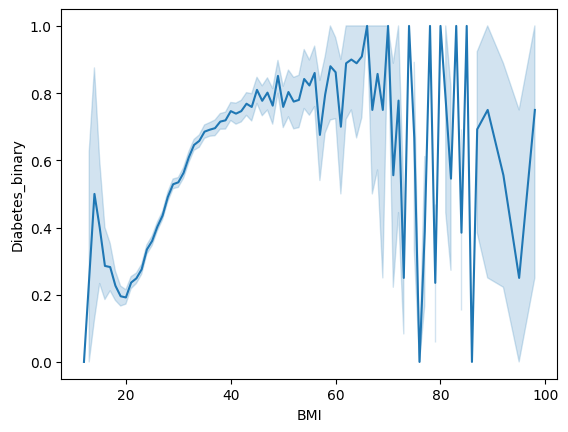

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# LINE PLOT

sns.lineplot(x='BMI', y='Diabetes_binary', data=data)
plt.show()

<Axes: title={'center': 'Correlation with Diabetes Prediction'}>

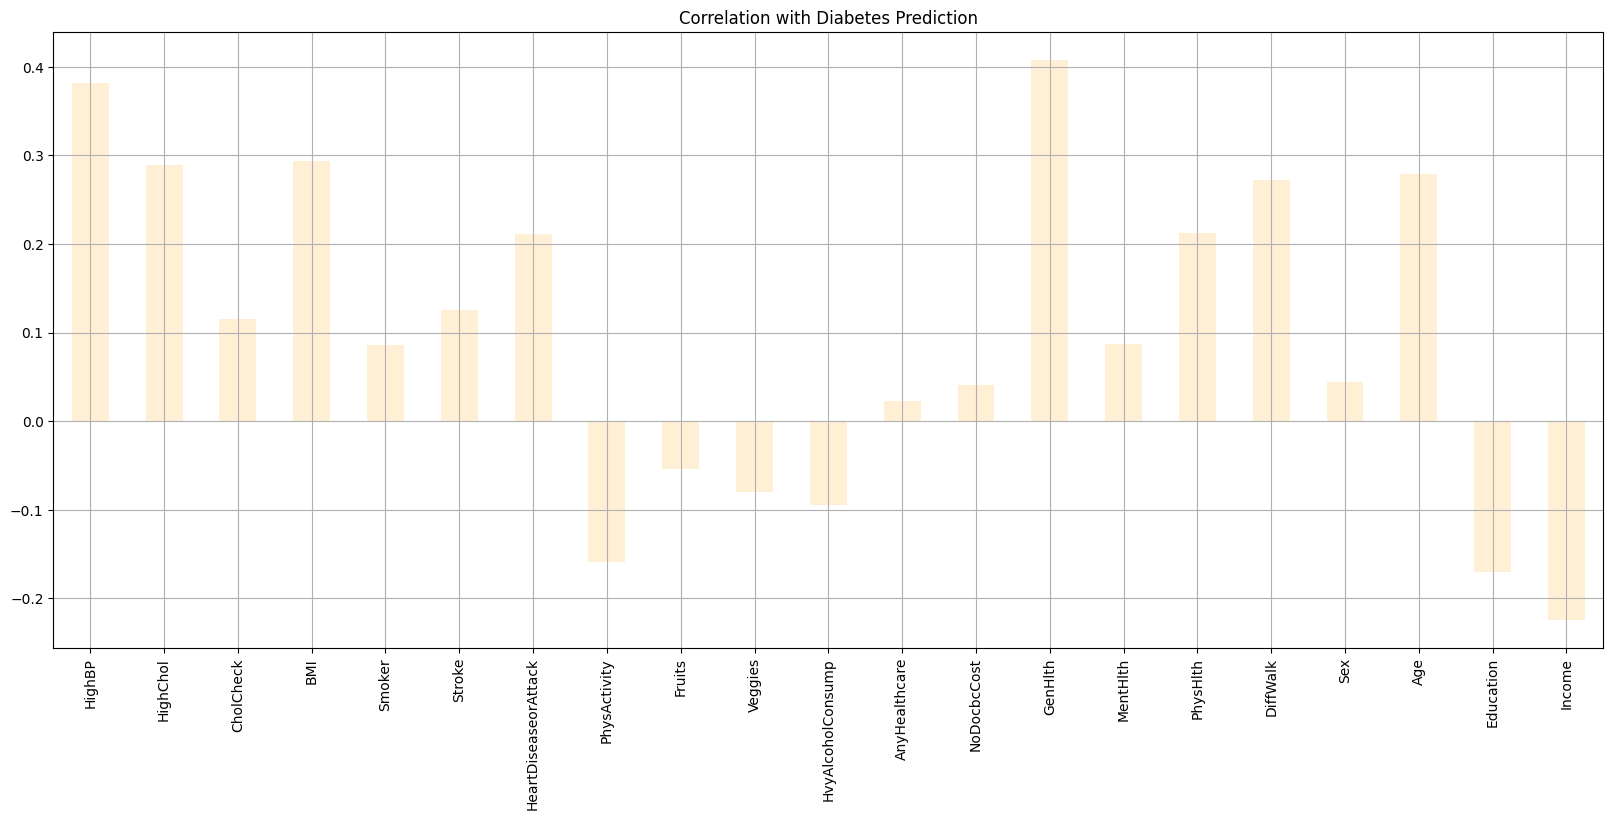

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Prediction", color='#FFEFD5')


# Visualizing the value count of Diabetes_binary using countplot

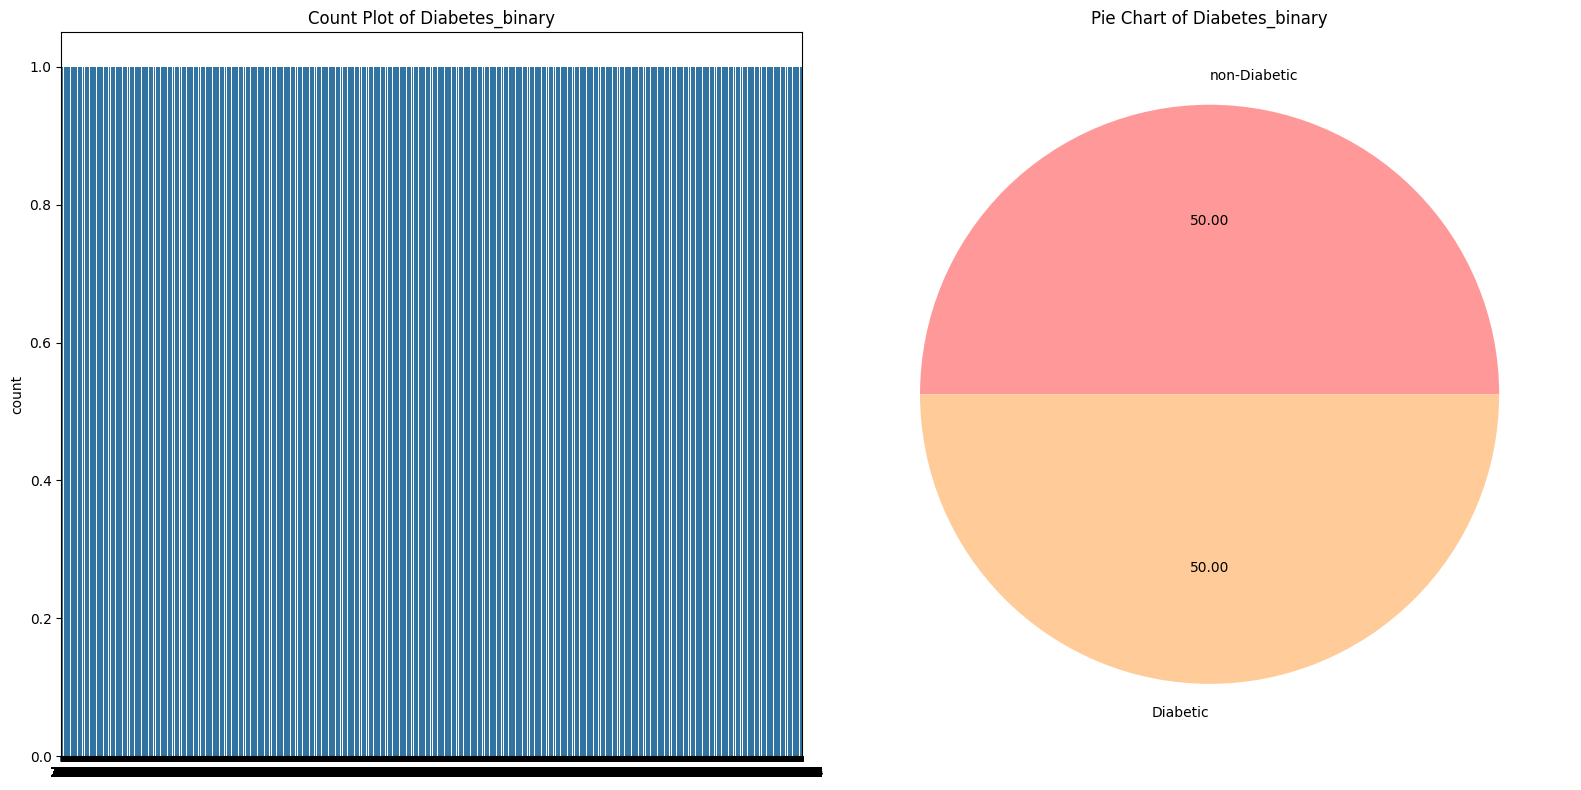

In [ ]:
# Create a figure with two subplots
figure1, plot1 = plt.subplots(1, 2, figsize=(16, 8))

# Count plot for the 'Diabetes_binary' column
sns.countplot(data['Diabetes_binary'], ax=plot1[0])
plot1[0].set_title('Count Plot of Diabetes_binary')

# Pie chart for the 'Diabetes_binary' column
labels = ["non-Diabetic", "Diabetic"]
plot1[1].pie(data["Diabetes_binary"].value_counts(), labels=labels, autopct='%.02f', colors=['#FF9999','#FFCC99'])
plot1[1].set_title('Pie Chart of Diabetes_binary')

# Display the plot
plt.tight_layout()
plt.show()


# Relation of HighBP with Diabetes_binary

---



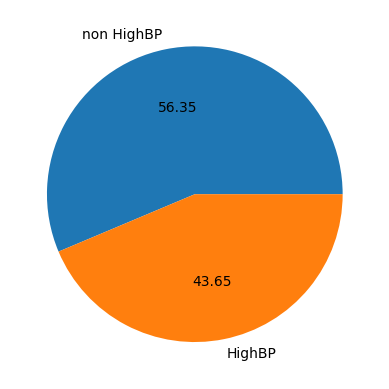

In [ ]:
labels=["non HighBP","HighBP"]

plt.pie(data["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

Checking the relation between HighBP and Diabetes_binary

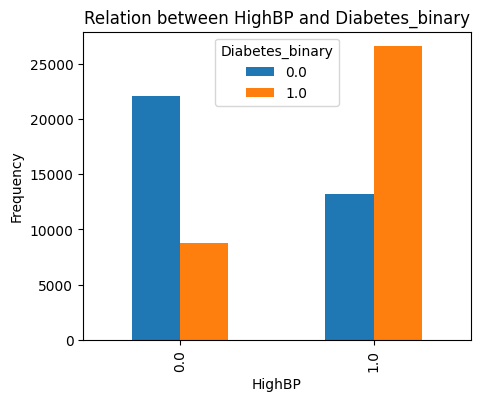

In [ ]:
pd.crosstab(data.HighBP, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

checking average of diabetic persons with HighBP and NO HighBP


relation of HighChol with **Diabetes_binary**

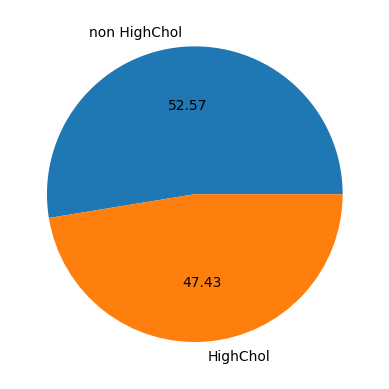

In [ ]:
labels=["non HighChol", "HighChol"]

plt.pie(data["HighChol"].value_counts() , labels =labels ,autopct='%.02f' );

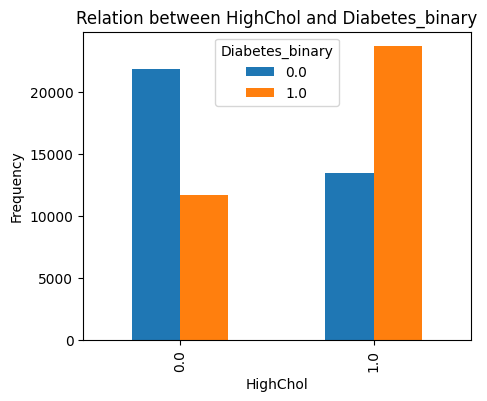

In [ ]:
pd.crosstab(data.HighChol, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()


checking average of diabetic persons with HighChol and NO HighChol

**checking HighBP and HighChol's combined effect on Diabetes_binary**

In [ ]:
(data.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].value_counts()/data.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                78.843295
                  1.0                21.156705
        1.0       0.0                58.125819
                  1.0                41.874181
1.0     0.0       1.0                55.359149
                  0.0                44.640851
        1.0       1.0                72.553907
                  0.0                27.446093
dtype: float64

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

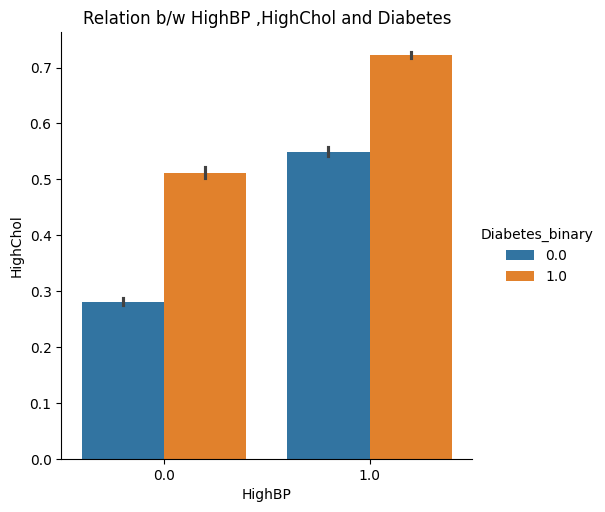

In [ ]:
sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_binary" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

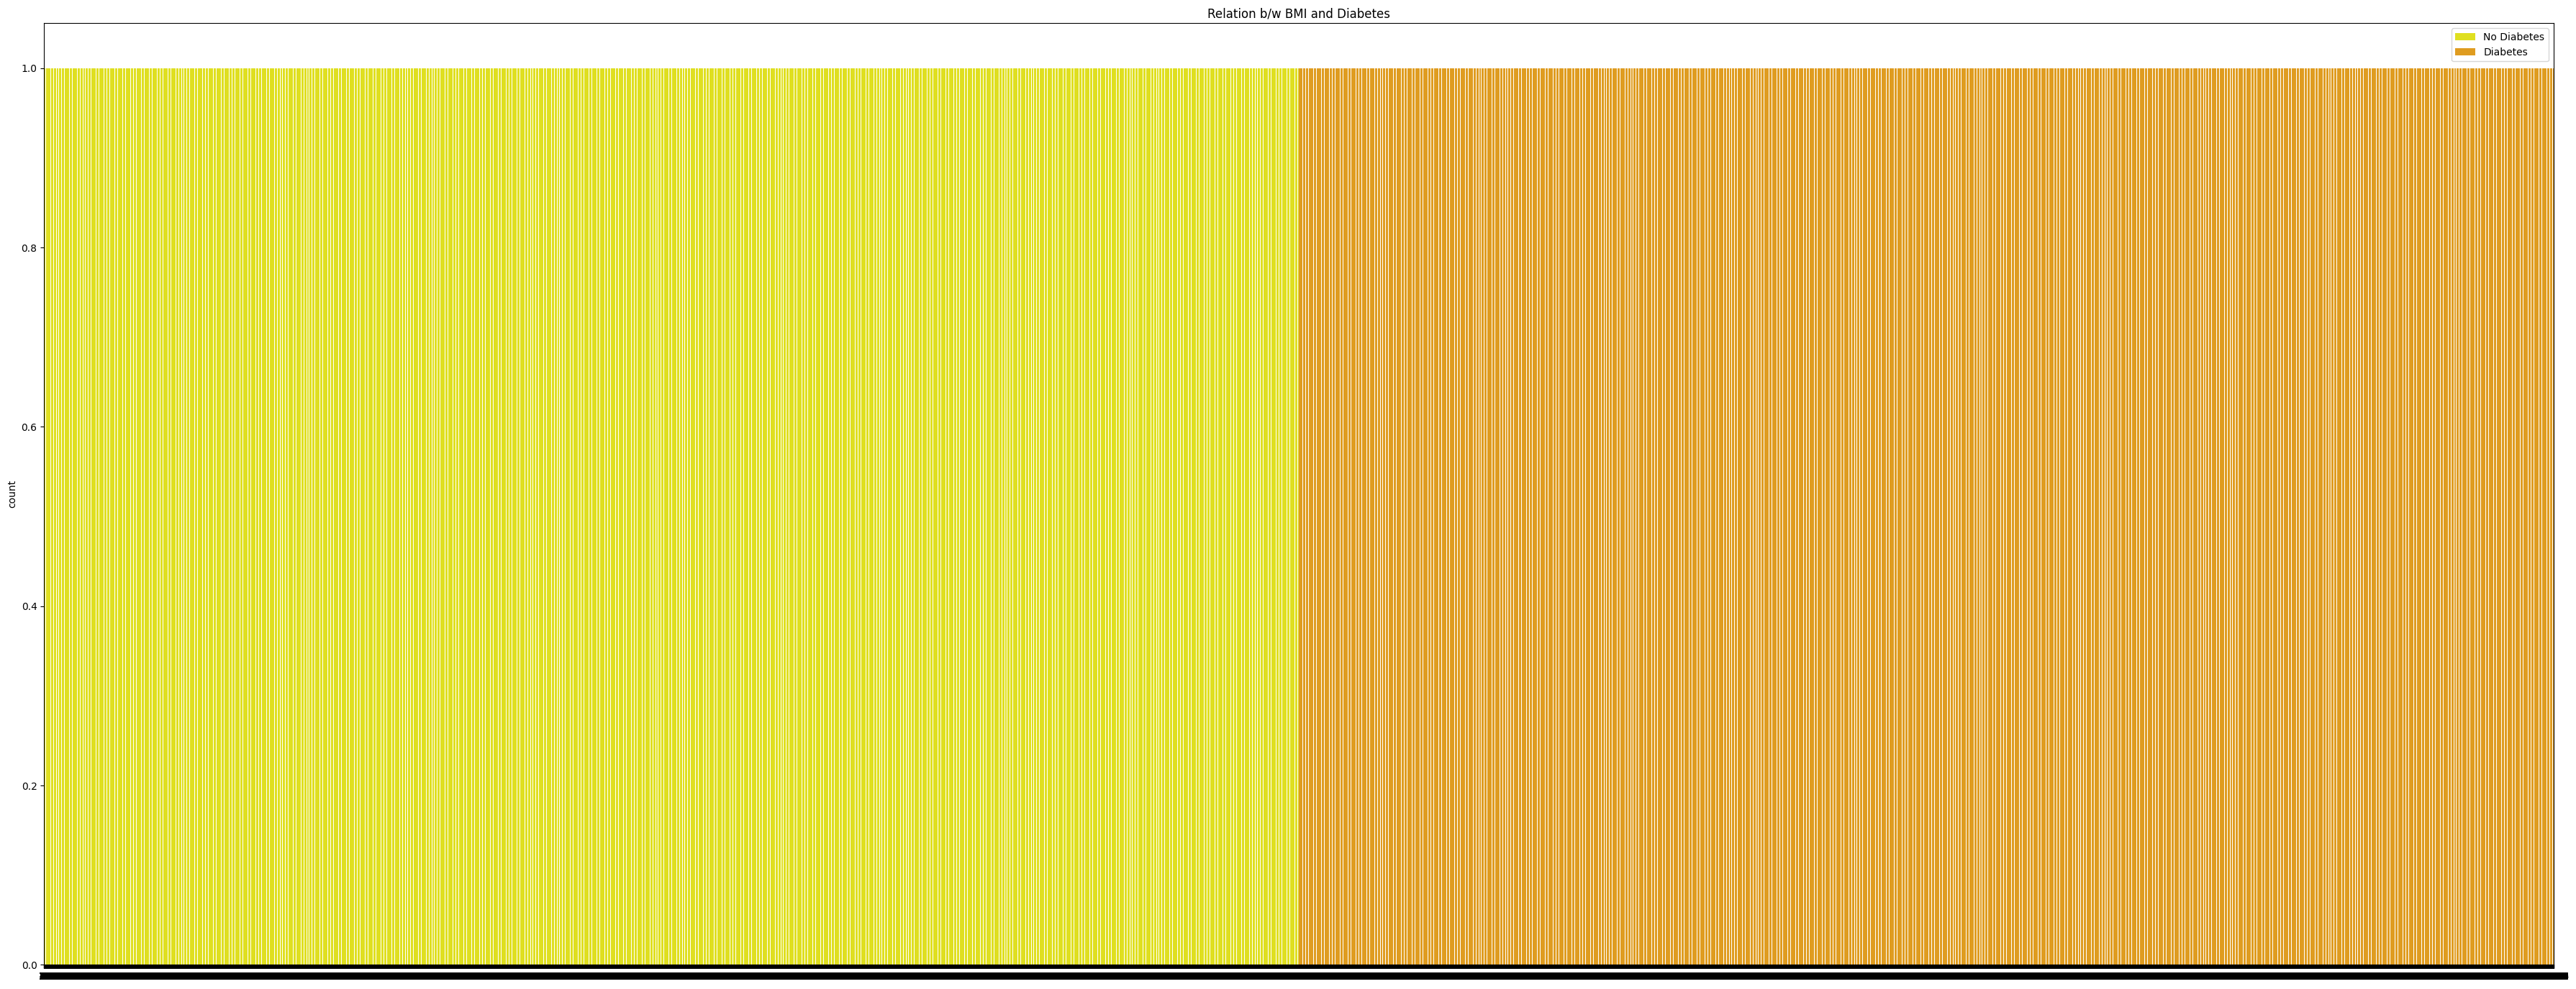

In [ ]:
plt.figure(figsize=(45, 17))
warnings.filterwarnings('ignore')

sns.countplot(data.BMI[data.Diabetes_binary == 0], color="yellow", label="No Diabetes")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="Orange", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")

plt.legend()


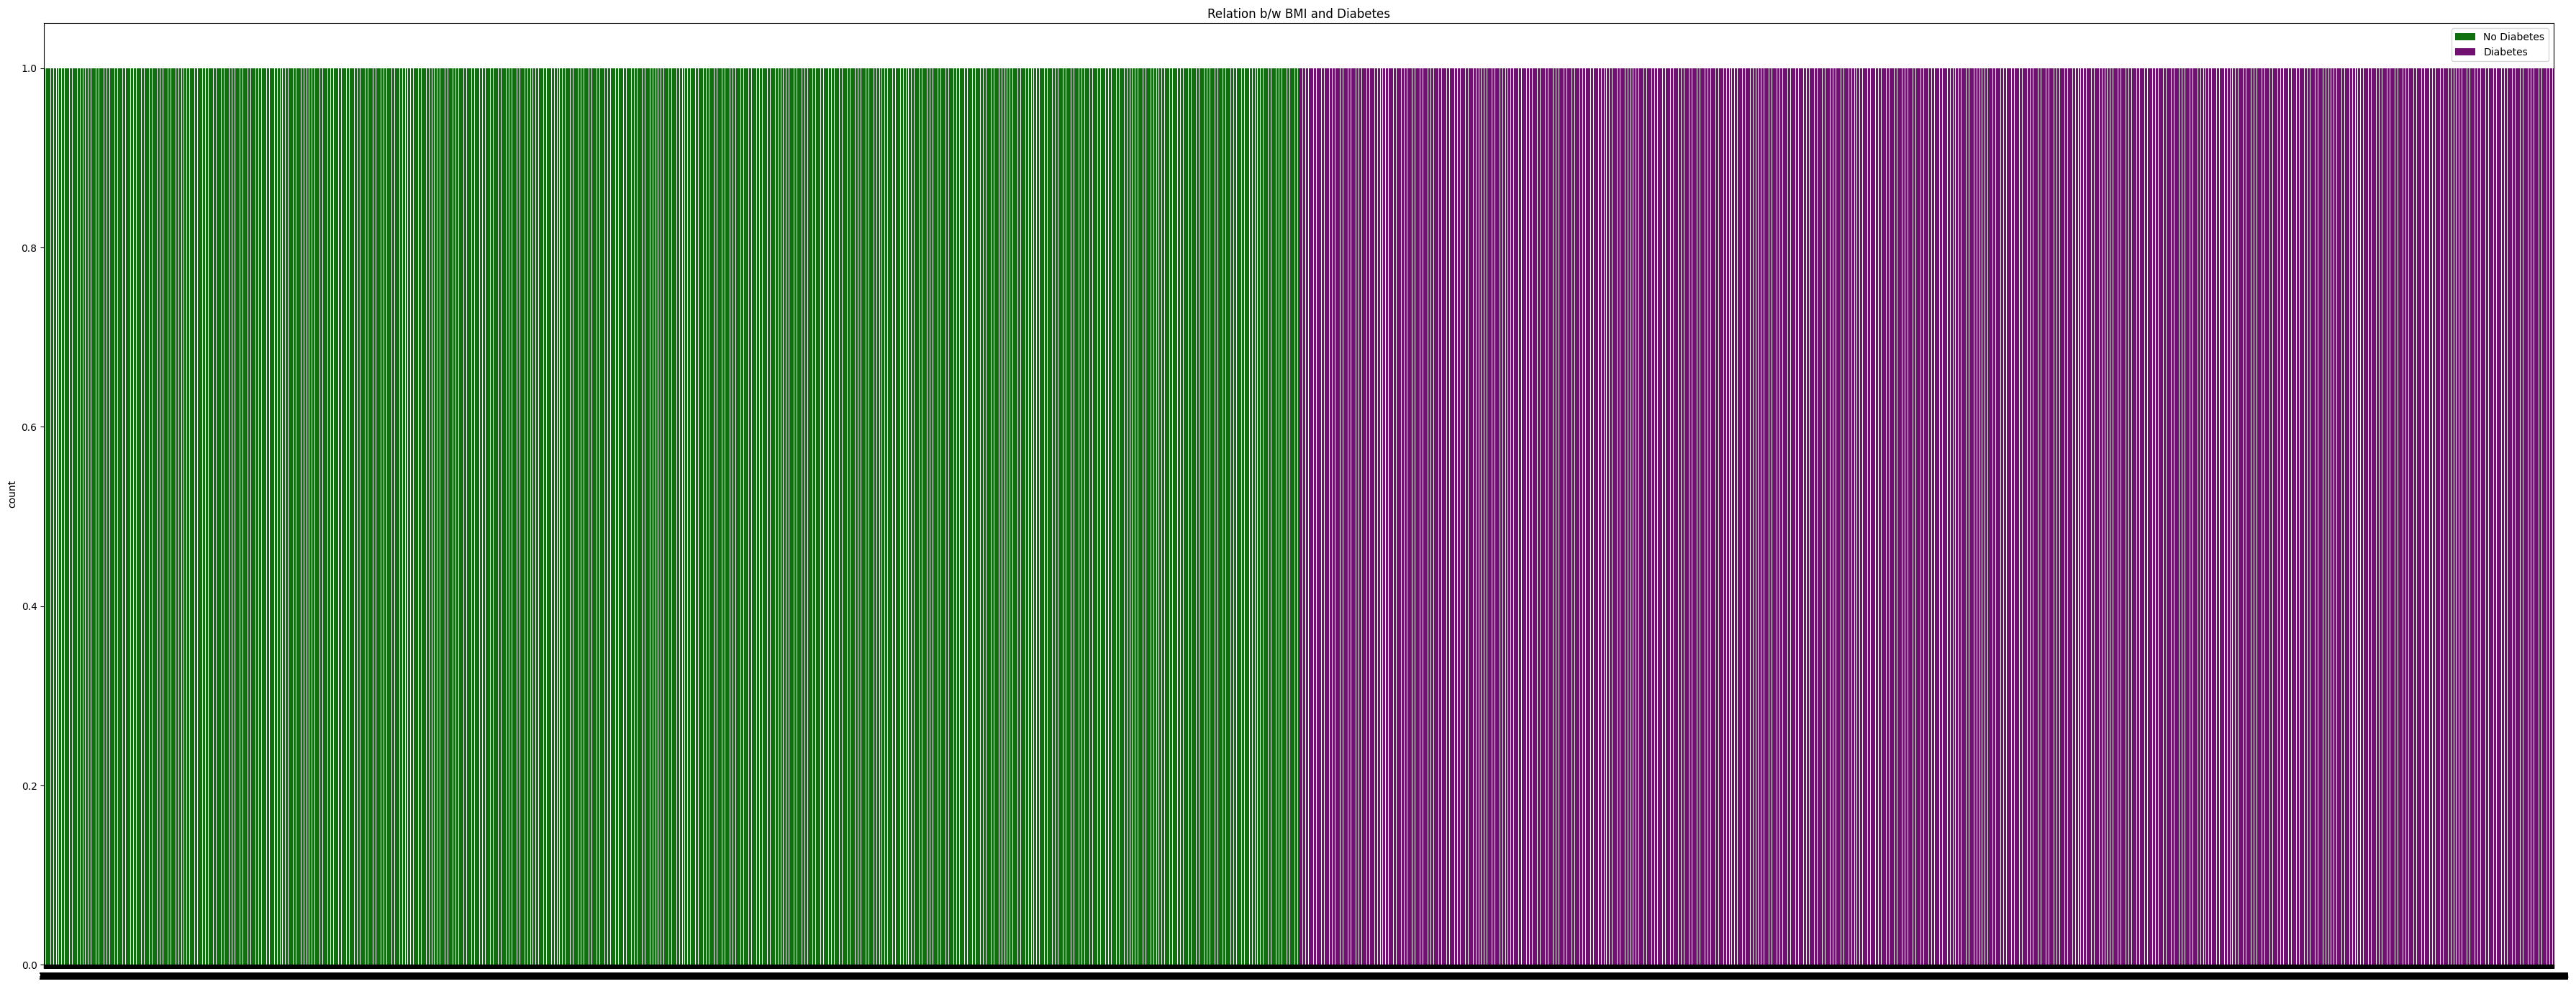

In [ ]:
plt.figure(figsize=(45, 17))
warnings.filterwarnings('ignore')

sns.countplot(data.BMI[data.Diabetes_binary == 0], color="green", label="No Diabetes")
sns.countplot(data.BMI[data.Diabetes_binary == 1], color="purple", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")

plt.legend()

Relation of Smoker with Diabetes_binary

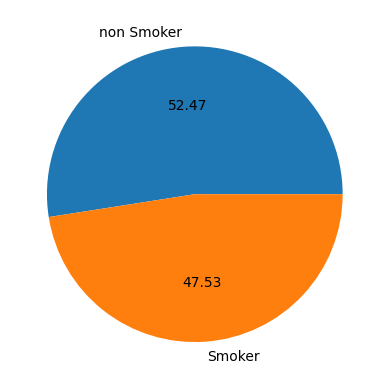

In [ ]:
labels=["non Smoker","Smoker"]

plt.pie(data["Smoker"].value_counts() , labels =labels ,autopct='%.02f' );

Checking the number of diabetic people who are Smokers and who are non-Smokers

In [ ]:
pd.crosstab(data.Smoker, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,20065,17029
1.0,15281,18317


checking the relation between Smoker and Diabetes_binary

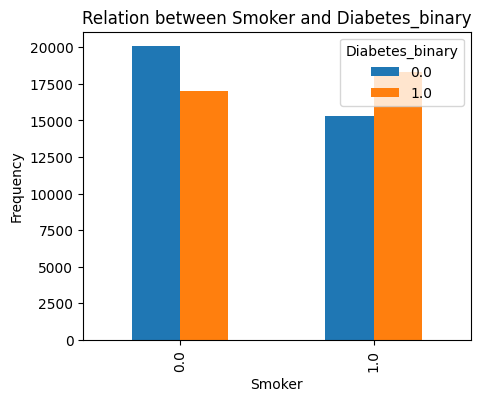

In [ ]:
pd.crosstab(data.Smoker, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()

**Conclusion**

According to this data, smoking does play a significant role in determining whether a patient is diabetic or not.

relation of HvyAlcoholConsump with Diabetes_binary

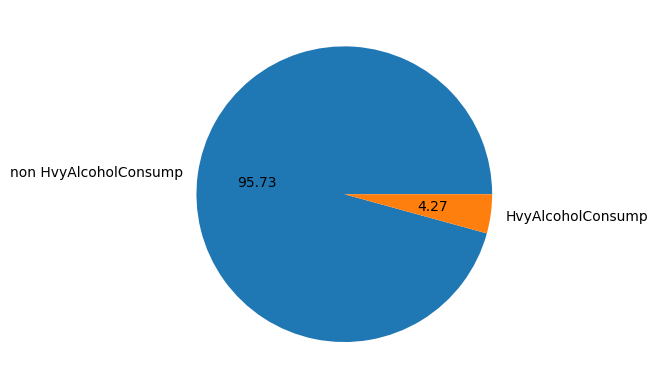

In [ ]:
labels=["non HvyAlcoholConsump","HvyAlcoholConsump"]

plt.pie(data["HvyAlcoholConsump"].value_counts() , labels =labels ,autopct='%.02f' );

checking the number of diabetic people who consume HvyAlcohol and who do not consume HvyAlcohol

In [ ]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,33158,34514
1.0,2188,832


checking the relation between HvyAlcoholConsump and Diabetes_binary

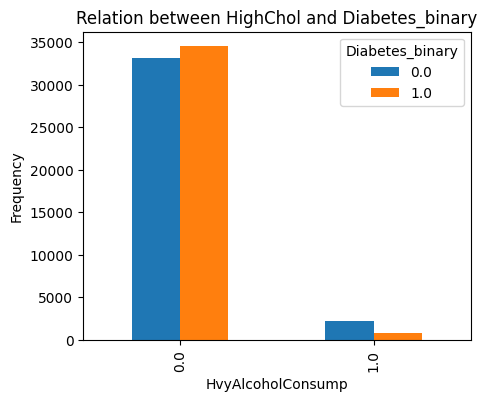

In [ ]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

**Conclusion**

The data doesn't have unequal proportions of diabetic patients and non-diabetic patients who consume and do not consume HvyAlcohol. Therefore, we cannot really predict the effect of HvyAlcoholConsump on Diabetic_binary

**checking Smoker and HvyAlcoholConsump's combined effect on Diabetes_binary**

In [ ]:
(data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                53.373076
                           1.0                46.626924
        1.0                0.0                79.300292
                           1.0                20.699708
1.0     0.0                1.0                55.993925
                           0.0                44.006075
        1.0                0.0                68.910095
                           1.0                31.089905
dtype: float64

**visualizing the above result**

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

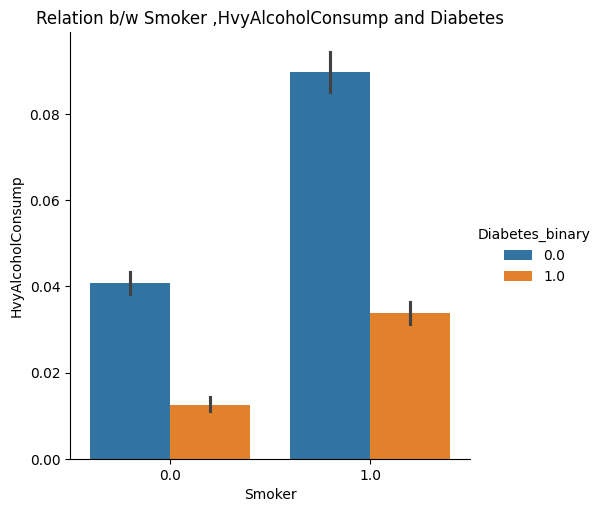

In [ ]:
sns.catplot (x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

In [ ]:
(data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100


Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                55.340444
                              1.0                44.659556
        1.0                   1.0                73.904807
                              0.0                26.095193
1.0     0.0                   1.0                68.227425
                              0.0                31.772575
        1.0                   1.0                81.677484
                              0.0                18.322516
dtype: float64

**visualizing the above result**

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

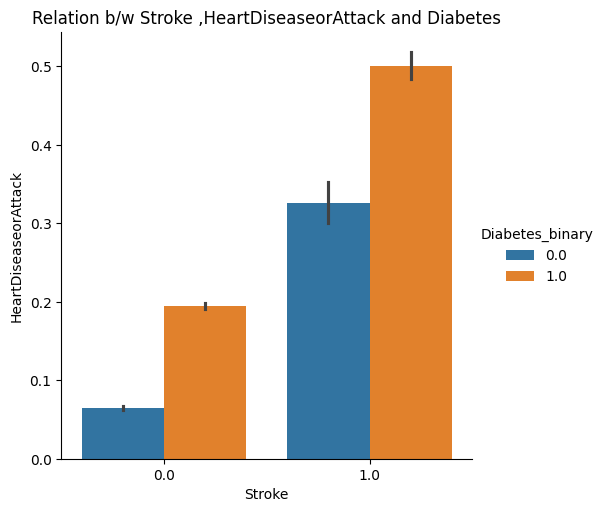

In [ ]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

relation of PhysActivity with Diabetes_binary

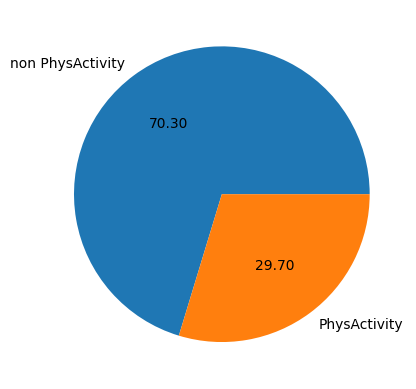

In [ ]:
labels=["non PhysActivity","PhysActivity"]

plt.pie(data["PhysActivity"].value_counts() , labels =labels ,autopct='%.02f' );

checking the number of diabetic people with PhysActivity and without PhysActivity

In [ ]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,7934,13059
1.0,27412,22287



checking the relation between PhysActivity and Diabetes_binary

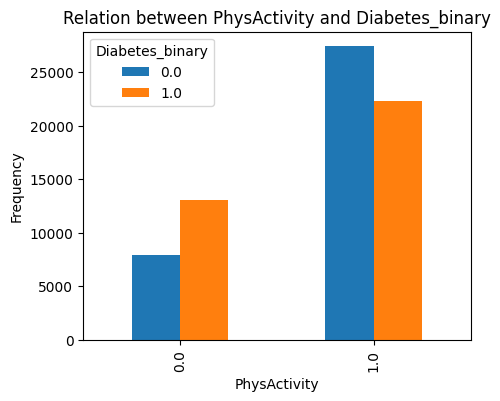

In [ ]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

relation of Fruits with Diabetes_binary


([<matplotlib.patches.Wedge at 0x7ec4f1ae5030>,
 [Text(-0.3784415568296707, 1.0328513872113139, 'no Fruits'),
  Text(0.37844155682967034, -1.0328513872113139, 'Fruits')],
 [Text(-0.20642266736163853, 0.5633734839334438, '61.18'),
  Text(0.20642266736163833, -0.5633734839334439, '38.82')])

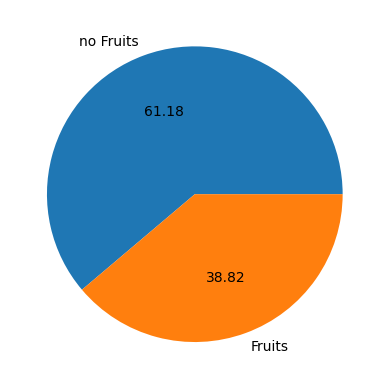

In [ ]:
labels=["no Fruits","Fruits"]

plt.pie(data["Fruits"].value_counts() , labels =labels ,autopct='%.02f' )

checking the number of diabetic people who consume Fruits and who do not

In [ ]:
pd.crosstab(data.Fruits, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,12790,14653
1.0,22556,20693


checking the relation between Fruits and Diabetes_binary

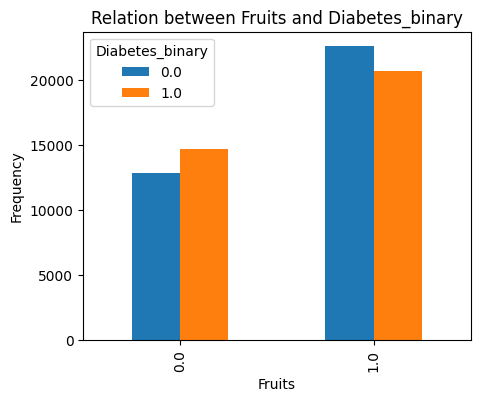

In [ ]:
pd.crosstab(data.Fruits, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

relation of Veggies intake with Diabetes_binary

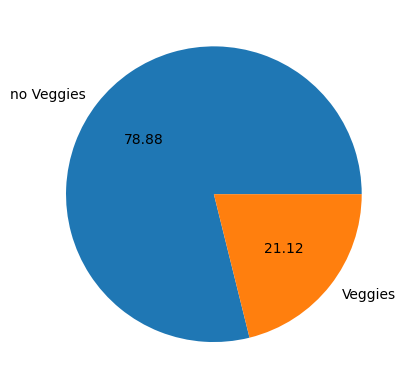

In [ ]:
labels=["no Veggies","Veggies"]

plt.pie(data["Veggies"].value_counts() , labels =labels ,autopct='%.02f' );

checking the number of diabetic people who consume Veggies and who do not

In [ ]:
pd.crosstab(data.Veggies, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Veggies,,
0.0,6322,8610
1.0,29024,26736


checking the relation between Veggies and Diabetes_binary

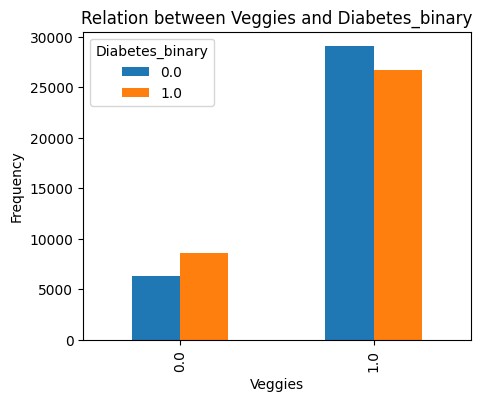

In [ ]:
pd.crosstab(data.Veggies, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Veggies and Diabetes_binary')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

**Understanding the health status of the respondants of the survey, by analyzing the effect of GenHlth , MentHlth , PhysHlth and DiffWalk on Diabetes_binary**

Q: Would you say that in general your health is

1: Excellent 2: Very good 3: Good 4: Fair 5: Poor

GenHlth vs Diabetes_binary

In [ ]:
pd.crosstab(data.GenHlth, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
GenHlth,,
1.0,7142,1140
2.0,13491,6381
3.0,9970,13457
4.0,3513,9790
5.0,1230,4578


checking the relation between GenHlth and Diabetes_binary

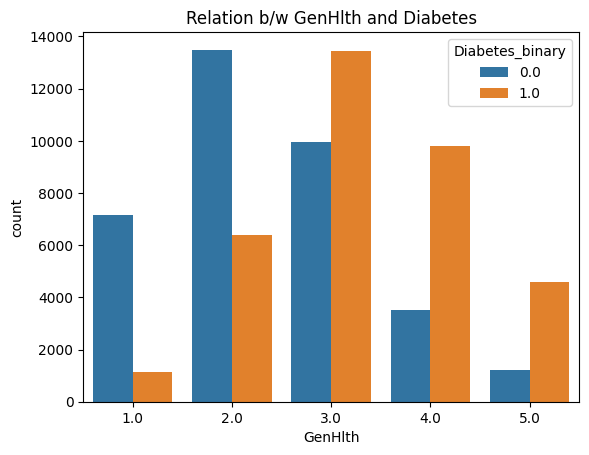

In [ ]:
sns.countplot(x="GenHlth", data=data, hue="Diabetes_binary")
plt.title("Relation b/w GenHlth and Diabetes")

# Display the plot
plt.show()

**relation of MentHlth with Diabetes_binary**

Q: Thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?


MentHlth vs Diabetes_binary **bold text**

In [ ]:
pd.crosstab(data.MentHlth, data.Diabetes_binary).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,24688,1239,1759,1043,492,1296,124,420,88,15,...,36,11,5,4,152,10,5,42,23,1552
1.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


viualizing the above result using distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

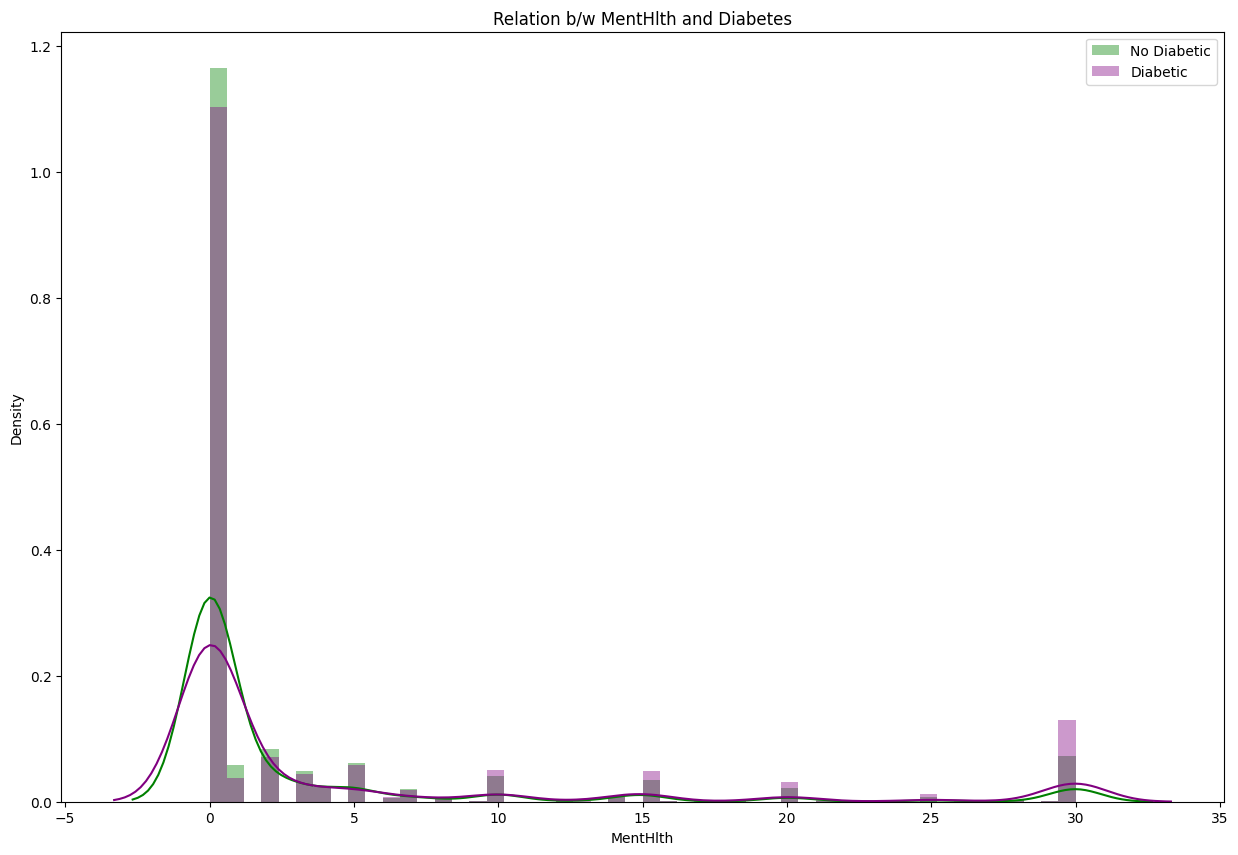

In [ ]:
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.MentHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

**Conclusion**

Mental health does not seem to have much effect in determining whether a perseon has diabetes or not

**relation of PhysHlth with Diabetes_binary**

Q: thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?

**PhysHlth vs Diabetes_binary**

In [ ]:
pd.crosstab(data.PhysHlth, data.Diabetes_binary).T

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,23175,1665,2074,1149,613,1018,165,583,117,19,...,90,8,11,9,163,4,13,68,21,2227
1.0,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


visualizing the above result using distplot

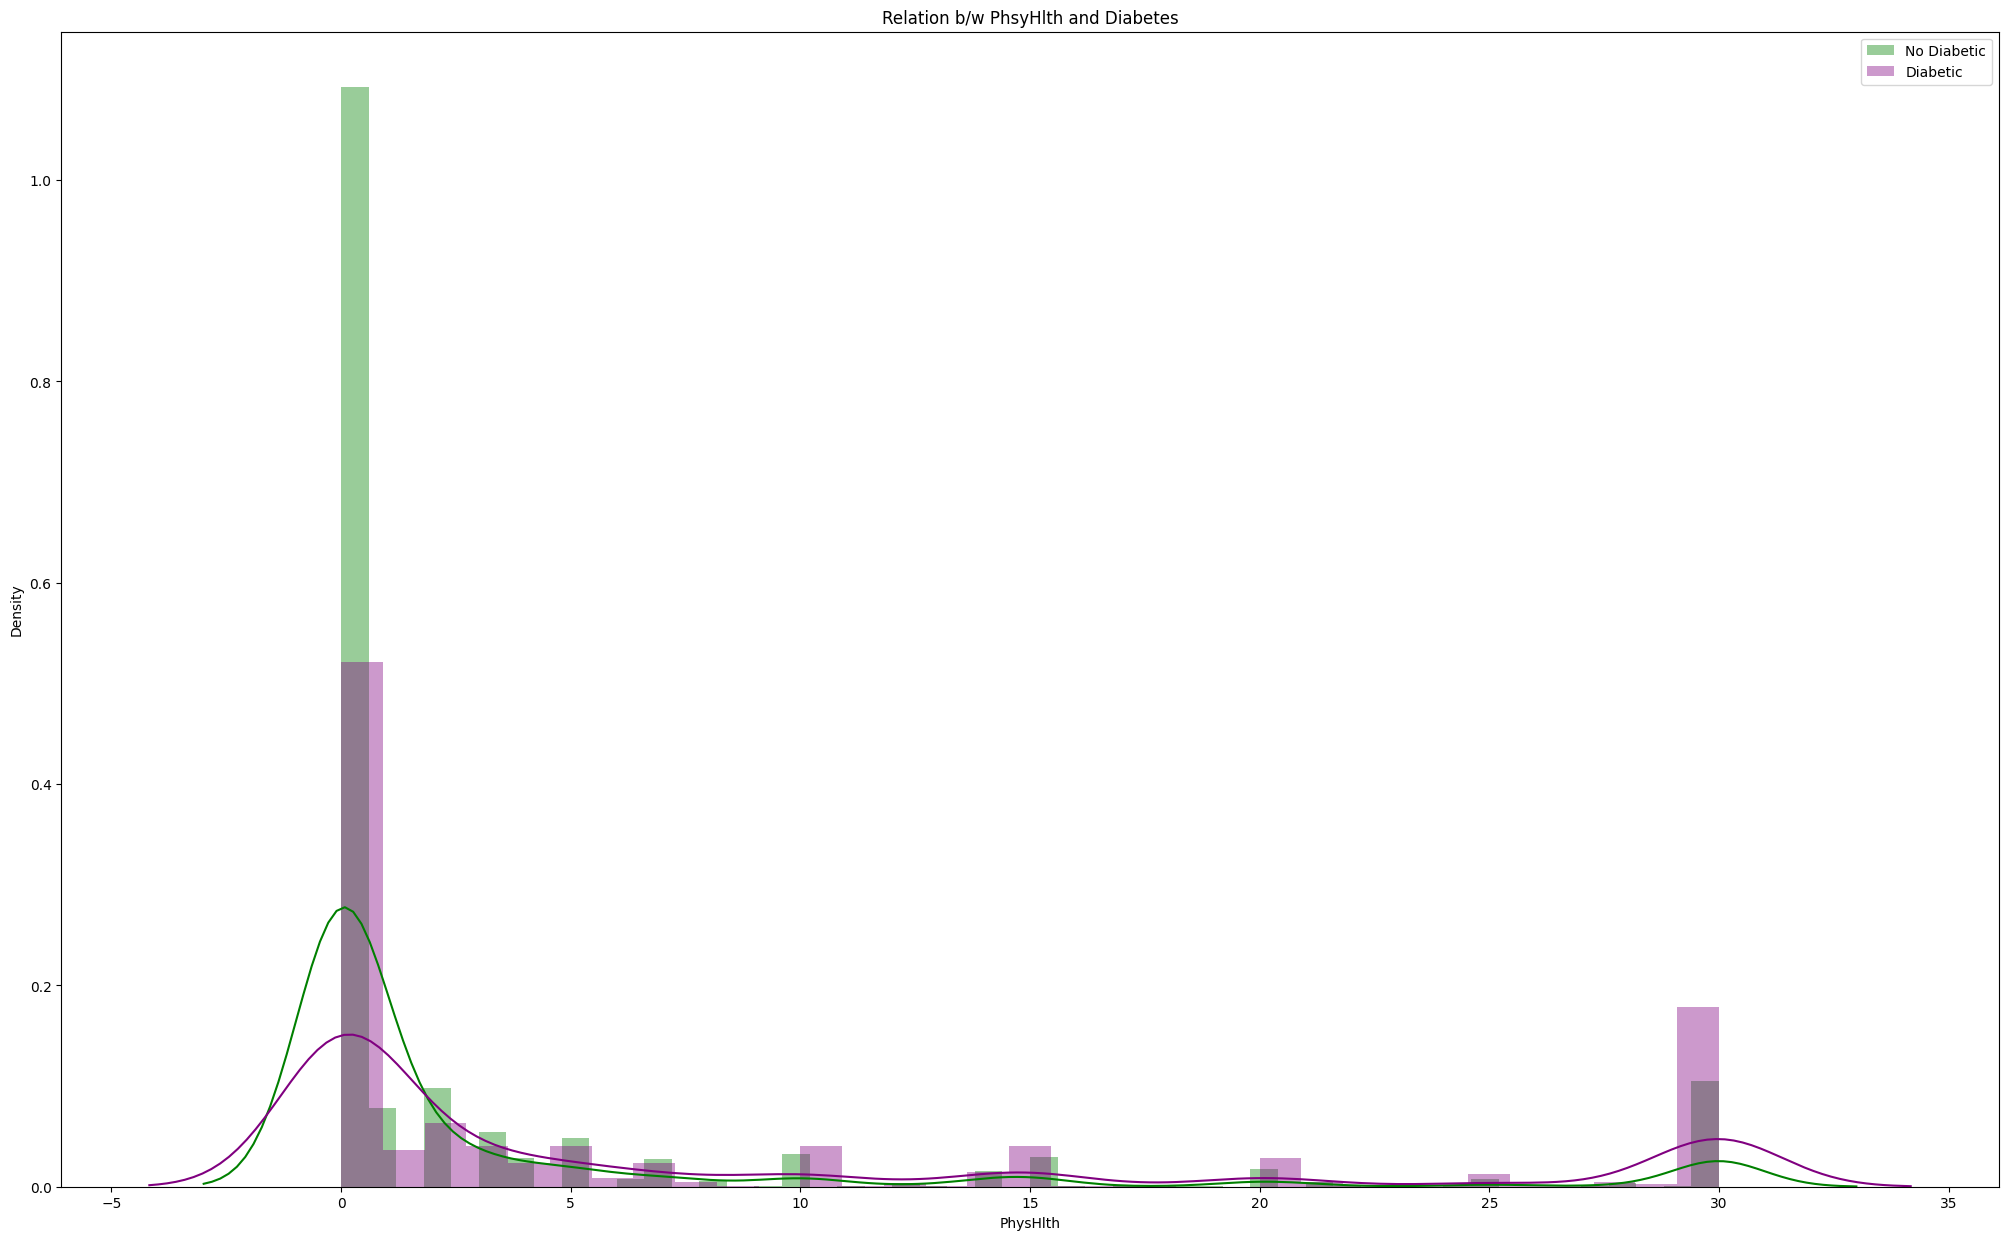

In [ ]:
plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.distplot(data.PhysHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.PhysHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w PhsyHlth and Diabetes")

plt.legend()

**Conclusion**

Mostly, the non diabetic patients have a better physical health

**relation of DiffWalk with Diabetes_binary**

Q: Do you have serious difficulty walking or climbing stairs?

1: Yes, 0: No

Diffwalk vs Diabetes_binary

In [ ]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).T

DiffWalk,0.0,1.0
Diabetes_binary,,
0.0,30601,4745
1.0,22225,13121


checking the relation between DiffWalk and Diabetes_binary

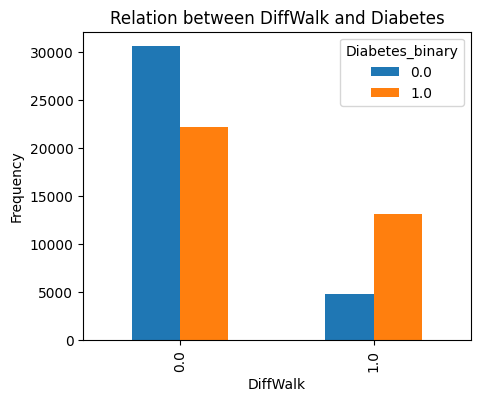

In [ ]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between DiffWalk and Diabetes')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.crosstab(data.Sex, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Sex,,
0.0,19975,18411
1.0,15371,16935


checking the relation b/w Sex and Diabetes

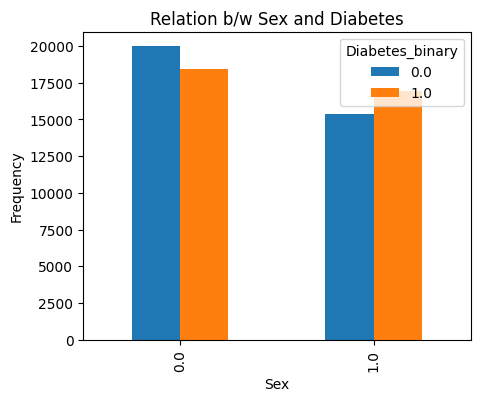

In [ ]:
pd.crosstab(data.Sex, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation b/w Sex and Diabetes')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

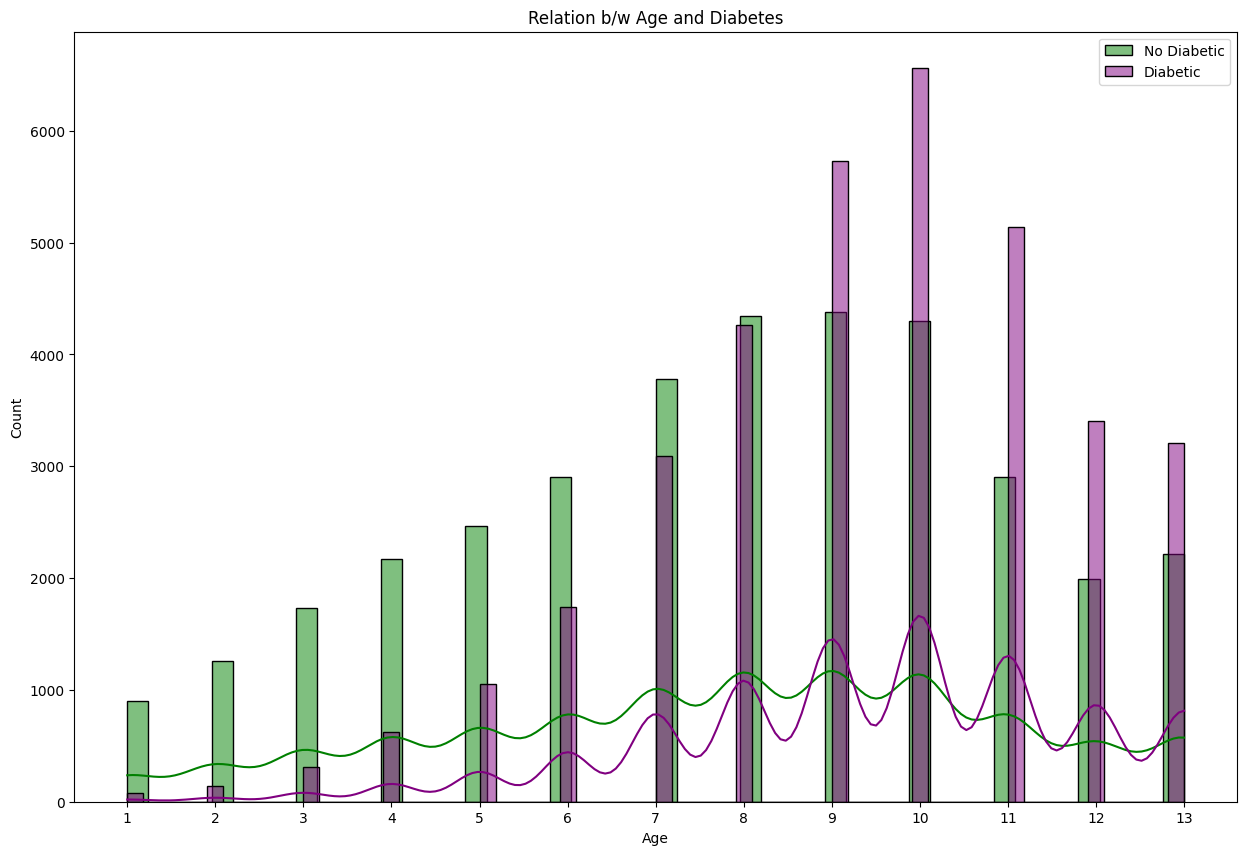

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data.Age[data.Diabetes_binary == 0], color="green", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_binary == 1], color="purple", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

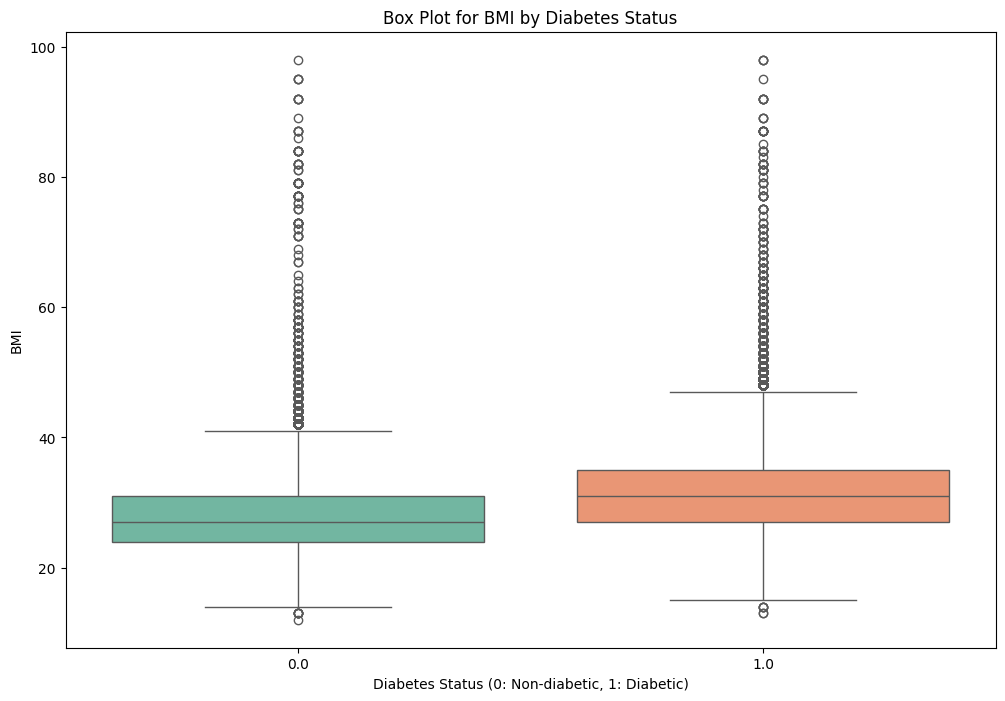

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for BMI by Diabetes Status
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot for BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()

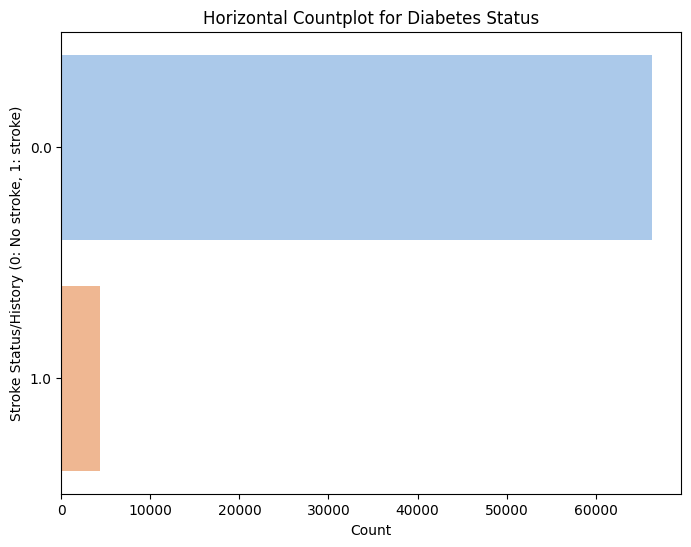

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Horizontal Countplot for Diabetes_binary
sns.countplot(y='Stroke', data=df, palette='pastel')

# Set plot title and labels
plt.title('Horizontal Countplot for Diabetes Status')
plt.xlabel('Count')
plt.ylabel('Stroke Status/History (0: No stroke, 1: stroke)')

# Show the plot
plt.show()